# Project Context: Automatidata and NYC TLC

This project involves a data professional at Automatidata, a data consulting firm, working with their client, the New York City Taxi and Limousine Commission (NYC TLC). The primary objective is to develop a multiple linear regression model to predict taxi fares using existing data collected over a year.

Significant progress has been made by the team through the project, having already completed an initial plan of action, preliminary Python coding work, Exploratory Data Analysis (EDA), and A/B testing. Following the review of the A/B test results, the focus now shifts to predicting taxi fare amounts.

The data team has assigned the task of building the regression model and updating the client, New York City TLC, on the progress.


#  Build a Multiple Linear Regression Model

This activity focuses on constructing a multiple linear regression model. Multiple linear regression is a valuable skill for data science professionals, enabling the estimation of linear relationships between a continuous dependent variable and two or more independent variables. 

**Project Purpose:** The purpose of this project is to demonstrate knowledge of Exploratory Data Analysis (EDA) and the application of a multiple linear regression model.

**Project Goal:** The goal is to build and evaluate a multiple linear regression model.

This activity is structured into three parts:

**Part 1: EDA & Checking Model Assumptions**

**Part 2: Model Building and Evaluation**

**Part 3: Interpreting Model Results**



**PACE stages** 

   * Plan
   * Analyze
   * Construct
   * Execute



## PACE: **Plan**


### Task 1. Imports and loading
Import the packages that are needed for building linear regression models.

In [15]:
# Imports

import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # for confusion matrix
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [17]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

df0.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80




## PACE: **Analyze**


This stage focuses on the detailed examination of the data and preparation for model building.

**Understanding the Data:**

* **Descriptive Statistics:** A comprehensive understanding of the central tendency, spread, and distribution of variables is gained through descriptive statistics (e.g., mean, median, standard deviation, histograms).
* **Visualizations:** Scatter plots, box plots, and other visualizations are employed to identify relationships between variables, discern patterns, and detect outliers.

**Checking Assumptions:**

* **Linearity:** The linearity of the relationship between the dependent and independent variables is assessed using scatter plots.
* **Normality:** The normality of the residuals is checked using histograms and Q-Q plots.
* **Homoscedasticity:** Residual plots are examined to ensure constant variance of errors.
* **Multicollinearity:** Correlation coefficients and Variance Inflation Factors (VIFs) are calculated to detect multicollinearity among independent variables.

**Identifying Potential Issues:**

* **Missing Values:** The extent and nature of missing data are determined.
* **Outliers:** Outliers that could unduly influence the model are detected.
* **Data Errors:** Inconsistencies or errors in the data are uncovered.

**Feature Engineering:**

* **Variable Creation:** New variables or interaction terms that might enhance the model's predictive power are created.

**Gaining Insights:**

* **Relationships:** Relationships and patterns that might not be obvious from the raw data are discovered.
* **Hypotheses:** Hypotheses about the relationships between variables are generated, which can then be tested with the regression model.


### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [25]:
# Start with `.shape` and `.info()`

# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
print(df.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

* The dataset has no missing values, with 22,699 non-null entries for each column. 
* It contains a mix of data types: 
  * integers  (e.g., VendorID, passenger_count), 
  * floats (e.g., fare_amount, trip_distance), 
  * objects for datetime and flag columns (tpep_pickup_datetime, store_and_fwd_flag).

* The Unnamed: 0 column  represents an index and can be removed. 
* The columns tpep_pickup_datetime and tpep_dropoff_datetime are treated as objects and should be converted to datetime format for easier manipulation. 
* The store_and_fwd_flag column can be converted to a categorical type . This conversion can help with tasks like one-hot encoding when preparing the data for machine learning models.

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [29]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# missing values
print(df.isna().sum())
print('Total count of missing values:', df.isna().sum().sum())

# dropping duplicate, shape
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Total count of missing values: 0
Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)


**No Missing Values**

The dataset has no missing values (every column has 0 missing entries).

This means we do not need to handle missing data through imputation.

**No Duplicate Rows**

The shape of the dataframe before and after dropping duplicates is the same ((22699, 18)), meaning there are no duplicate rows in the dataset.

This ensures that each taxi trip record is unique.

**Dataset is Clean & Ready for Analysis**
Since there are no missing values and no duplicates, the dataset is already well-prepared for further analysis, feature engineering, and modeling.

We can proceed directly to exploratory data analysis (EDA) and regression modeling without needing data cleaning steps like imputation or duplicate removal.


Use `.describe()`.

In [33]:
# Use .describe()
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [35]:
print(df.describe().to_csv()) 

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0
mean,56758486.17128508,1.5562359575311688,1.6423190448918454,2.9133129212740645,1.0433939821137495,162.41235296709107,161.52799682805409,1.336887087536896,13.026629366932465,0.33327459359443146,0.4974448213577691,1.8357813119520685,0.3125415216529363,0.2995506409974007,16.310502224767614
std,32744929.49214843,0.49683839619950737,1.2852311189940473,3.6531711828338906,0.7083908849941992,66.63337338646765,70.13969073441449,0.4962110576796442,13.243790516711957,0.46309657874841936,0.03946498733150259,2.8006262722637487,1.3992119315578602,0.015672737641520575,16.097295300636688
min,12127.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-120.0,-1.0,-0.5,0.0,0.0,-0.3,-120.3
25%,28520556.0,1.0,1.0,0.99,1.0

**Key Observations:**

**Outliers:**

Tip Amount (200) and Total Amount (1,200) are significant outliers. These may require further investigation, as they could represent rare events or errors.

**Near-Constant Variables:**

mta_tax and improvement_surcharge show minimal variability, suggesting they may not be useful for predictive modeling and could be excluded.


**Min/Max Values:**

Fare Amount has negative values (-$120) and very high values ($999.99), indicating possible data entry errors 

Trip Distance includes 0 values, possibly due to failed or canceled trips.

**Percentiles:**

Most fare_amount values are relatively low, with the 25th percentile at $6.5 and the 50th percentile (median) at $9.5.

The 75th percentile is 14.5, indicating that 75 percentage of the fare amounts are below this value, with a few higher fares pushing it up.

**Next Steps:**

Handle Outliers: Review the extreme values for accuracy.

Drop Low-Variance Features: Consider excluding mta_tax and improvement_surcharge.

Clean Data: Correct or filter out negative and zero values in fare_amount and trip_distance.


### Task 2b. Convert pickup & dropoff columns to datetime


In [39]:
# Check the format of tpep_pickup_datetime
df["tpep_pickup_datetime"][0]


'03/25/2017 8:55:43 AM'

In [41]:


# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert  types of `tpep_pickup_datetime`, `tpep_dropoff_datetime` to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"],format = '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(5)



Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [45]:
# Create `duration` column AND converts the duration to a numerical value representing the total duration in minutes.
#df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] calculates the difference between the dropoff and pickup times. 
# Since both columns are in datetime format, the result of this subtraction is a Timedelta object.
# Dividing by np.timedelta64(1, 'm') converts this Timedelta into minutes.

df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df['duration'].head(5)

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [48]:
### YOUR CODE HERE ###

df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


In [50]:
print(df.describe().to_csv()) 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22699.0,22699.0,22699,22699,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0
mean,56758486.17128508,1.5562359575311688,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.6423190448918454,2.9133129212740645,1.0433939821137495,162.41235296709107,161.52799682805409,1.336887087536896,13.026629366932465,0.33327459359443146,0.4974448213577691,1.8357813119520685,0.3125415216529363,0.2995506409974007,16.310502224767614,17.013776671512694
min,12127.0,1.0,2017-01-01 00:08:25,2017-01-01 00:17:20,0.0,0.0,1.0,1.0,1.0,1.0,-120.0,-1.0,-0.5,0.0,0.0,-0.3,-120.3,-16.983333333333334
25%,28520556.0,1.0,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.0,0.99,1.0,114.0,112.0,1.0,6.5,0.0,0

* The majority of taxi rides have durations between 6.65 minutes and 18.38 minutes, with an average duration of about 17 minutes. However, there are significant outliers (both very short and very long durations) that need further investigation or cleaning. The minimum duration is -16.98 minutes, which is likely an error, and the maximum duration is 1439.55 minutes, which suggests a ride that lasted nearly 24 hours, likely indicating a data issue or an unusual event.

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



**Here are the short comments on the key columns with the minimum, 25th percentile, 50th percentile, 75th percentile, and maximum values:**

**trip_distance:**

Min: 0.0 miles

25th percentile: 0.99 miles

50th percentile: 1.61 miles

75th percentile: 3.06 miles

Max: 33.96 miles

* There are trips with very short distances (0 miles) and some exceptionally long trips (up to 33.96 miles) that may require further inspection.

**fare_amount:**

Min: -$120.0

25th percentile: $6.5

50th percentile: $9.5

75th percentile: $14.5

Max: $999.99

* Negative fare amounts and unusually high fares are present, which should be checked for errors or outliers.

**duration:**

Min: -16.98 minutes

25th percentile: 6.65 minutes

50th percentile: 11.18 minutes

75th percentile: 18.38 minutes

Max: 1439.55 minutes (24 hours)

* Negative duration values and extreme outliers with durations over 24 hours are present and need further investigation.

### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

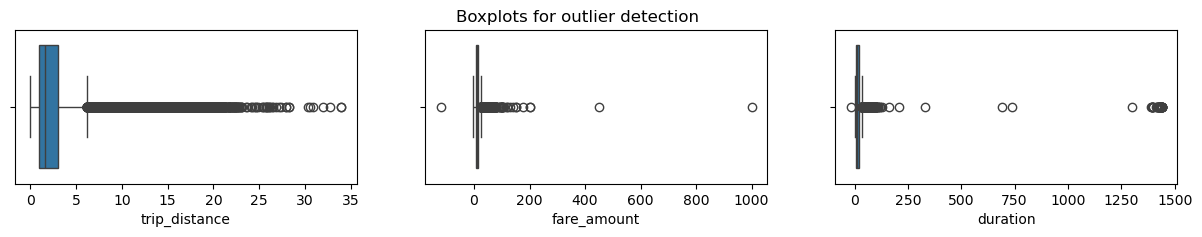

In [56]:
fig, axes = plt.subplots(1,3,figsize=(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x= df["trip_distance"])
sns.boxplot(ax=axes[1],x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show()



**The analysis found outliers in three variables: trip_distance, fare_amount, and duration.**

**trip_distance:**

Outliers: Some trips have very long distances, but these are considered believable. It's possible to have long trips within NYC.

Action: We'll leave these values alone, as they likely represent genuine long trips.

**fare_amount:**

Outliers: Some trips have extremely high fares. While fares can vary, there's a limit to how expensive a taxi ride within NYC is likely to be. Extremely high fares might be due to errors or unusual circumstances.

Action: We'll need to investigate these outliers further to understand if they are valid or need adjustment.

**duration:**

Outliers: Some trips have extremely long durations. Similar to fares, there's a reasonable limit to how long a taxi trip within NYC should take. Extremely long durations might indicate errors or unusual events (e.g., a traffic jam, a detour).

Action: We'll need to investigate these outliers to determine if they are valid or need adjustment.

**Zero or negative values (all variables):**

trip_distance: A trip can't have zero  distance.

fare_amount: A taxi ride can't cost zero or negative dollars.

duration: A trip can't take zero or negative time.

Action: These values are likely errors and need to be addressed (e.g., by removing them or imputing with more reasonable values).


**We need to investigate and potentially adjust outliers in fare_amount and duration, as well as any values of 0 or less in all three variables. This will help ensure that our analysis and modeling are based on reliable and accurate data.**

### Task 2e. Imputations


#### `trip_distance` outliers

The summary statistics indicate the presence of `trip_distance` values of 0. To determine if these represent erroneous data or genuinely very short trips that were rounded down, an investigation is conducted.

To check this, the column values are sorted, duplicates are eliminated, and the least 10 values are inspected. This examination helps ascertain whether these values are rounded or precise.


In [63]:
# Are trip distances of 0 bad data or very short trips rounded down?

sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [66]:
sum(df['trip_distance']==0)

148

*  The 148 trips with a trip_distance of 0 are relatively insignificant compared to the total number of trips (~23,000). While we could impute these values with a small positive value like 0.01, it's unlikely to have a major impact on the model's performance. Therefore, the decision is to leave the trip_distance column as is and not make any adjustments for these outliers.

#### `fare_amount` outliers

In [70]:
### YOUR CODE HERE ###
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?


**There are a few key observations about the fare_amount column:**

* Negative Fare (-120.00) , This is unrealistic and likely an error or incorrect data entry.
* Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.
* Extremely High Fare (999.99) , This may be an outlier and should be checked.
* High Standard Deviation (13.24) , Indicates significant variation in fare amounts.
* The large gap between the mean (13.03) and max (999.99) suggests potential outliers.
* The Interquartile Range (IQR) for fare_amount is 8, calculated as Q3 - Q1. Using the standard method (Q3 + 1.5 * IQR), the upper limit for outliers is 26.50.  However, this seems too low for realistic taxi fares. So, we adjust the factor from 1.5 to 6, resulting in an upper limit of 62.50, which is a more reasonable cap for fare amounts, preventing unrealistic fares like $999.99.

**Impute values less than $0 with 0.**


In [74]:
# Impute values less than $0 with 0
df.loc[df['fare_amount']<0, 'fare_amount']=0
df['fare_amount'].min()
       

0.0

**Now impute the maximum value as `Q3 + (6 * IQR)`.**

In [77]:
# This function imputes outlier values in the specified columns of the DataFrame based on the Interquartile Range (IQR).
# It first handles negative values by setting them to zero,
# then calculates the upper threshold for outliers using a customizable IQR factor.
# Any value above this threshold is replaced by the threshold value.
# The function works on each column in the provided list and updates the DataFrame in place.

#Function to handle outliers in specified columns.
def outlier_imputer(column_list, iqr_factor):   
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    
    
    
    # Loop through the columns in the list
    for col in column_list:
        
            # Reassign minimum to zero
            df.loc[df[col] < 0, col] = 0
            
         
            # Calculate the first (Q1) and third (Q3) quartiles
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            
            # Calculate the Interquartile Range (IQR)
            iqr = q3-q1
            
            # Calculate the upper threshold for outliers based on the IQR and the adjustment factor
            upper_threshold = q3+ (iqr_factor*iqr)
            
            # Print the column name, Q3, and the calculated upper threshold
            print(col)
            print('q3:', q3)
            print('upper_threshold:', upper_threshold)
      
           
            # Reassign values greater than the upper threshold to the upper threshold value
            df.loc[df[col]>upper_threshold, col] = upper_threshold
            # Print the summary statistics of the column after adjustments
            print(df[col].describe()) 
            print() # Add a blank line for better readability
            
    

In [79]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [82]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [85]:
# Impute a 0 for any negative values
df.loc[df['duration']<0 , 'duration'] = 0
df['duration'].min()

0.0

In [87]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering



#### Create `mean_distance` column

When a model is deployed, the actual `trip_duration` is unknown until after the trip has occurred, making it unsuitable as a direct feature for prediction. To address this, a proxy feature can be engineered by leveraging statistical information from known trips.

In this step, a new column named `mean_distance` is created. This column captures the mean distance for each unique pairing of pickup and dropoff locations.

For example, given the following data:

| Trip | Start | End | Distance |
| ---: | :---: | :-: | :---: |
| 1    | A     | B   | 1     |
| 2    | C     | D   | 2     |
| 3    | A     | B   | 1.5   |
| 4    | D     | C   | 3     |

The calculated average distances would be:

A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles


It is important to note that a trip from C to D is treated distinctly from a trip from D to C. All trips sharing a unique pair of start and end points are grouped, and their distances are averaged.

Subsequently, the `mean_distance` column is added to the dataset, where each row's value corresponds to the average distance for its specific pickup and dropoff location pair:

| Trip | Start | End | Distance | mean_distance |
| ---: | :---: | :-: | :---: | :---: |
| 1    | A     | B   | 1      | 1.25          |
| 2    | C     | D   | 2      | 2             |
| 3    | A     | B   | 1.5    | 1.25          |
| 4    | D     | C   | 3      | 3             |

To facilitate this grouping, a helper column named `pickup_dropoff` is first created. This column contains the unique combination of pickup and dropoff location IDs for each row.

A common method to construct `pickup_dropoff` is to convert the pickup and dropoff location IDs to string format and then concatenate them, separated by a space. The inclusion of a space ensures that distinct pairs, such as '12' and '151', are not conflated with '121' and '51'.

Thus, the new column would appear as:

| Trip | Start | End | pickup_dropoff |
| ---: | :---: | :-: | :---: |
| 1    | A     | B   | 'A B'          |
| 2    | C     | D   | 'C D'          |
| 3    | A     | B   | 'A B'          |
| 4    | D     | C   | 'D C'          |

In [92]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] =df['PULocationID'].astype(str) +" "+df['DOLocationID'].astype(str)
df['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [95]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped.head(5)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [98]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When we pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [102]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [105]:
# Step 1: Group the dataframe by the 'pickup_dropoff' column and calculate the mean duration for each group
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Step 2: Convert the grouped DataFrame into a dictionary
# The keys of the dictionary will be 'pickup_dropoff' combinations, 
# and the values will be the corresponding mean 'duration' values for those combinations.
grouped_dict = grouped.to_dict()

# Step 3: Extract the 'duration' column from the dictionary
# The outer key is 'duration', so we access it to get the actual dictionary that contains the mean durations for each pickup_dropoff pair.
grouped_dict = grouped_dict['duration']

# Step 4: Create a new column 'mean_duration' in the original dataframe 
# This column will initially be a copy of the 'pickup_dropoff' column
df['mean_duration'] = df['pickup_dropoff']

# Step 5: Use the map() method to replace the 'pickup_dropoff' values with the corresponding mean duration values
# The map() method will look up the value for each 'pickup_dropoff' pair from the 'grouped_dict' dictionary and assign it to the 'mean_duration' column.
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Step 6: Confirm that the mapping worked correctly by checking the mean_duration for a specific pair of pickup and dropoff locations
# In this case, we are checking for rows where PULocationID is 100 and DOLocationID is 231.
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [108]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month']= df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [111]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [113]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val  

In [115]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_16858/3278249955.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

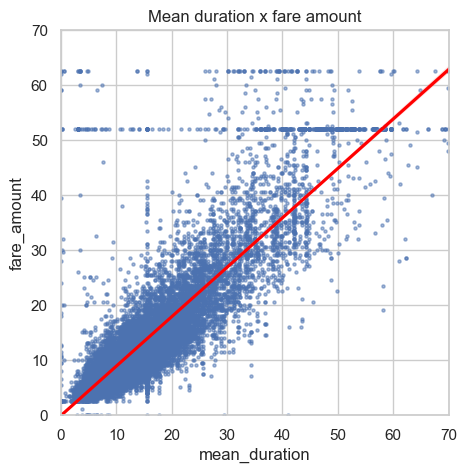

In [118]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.set(style='whitegrid')  # Set a clean, white grid background for the plot

f = plt.figure()  # Create a figure object
f.set_figwidth(5)  # Set figure width to 5 inches
f.set_figheight(5)  # Set figure height to 5 inches

sns.regplot(x=df['mean_duration'], y=df['fare_amount'],  # Create a regression plot
            scatter_kws={'alpha':0.5, 's':5},  # Set scatter plot transparency (alpha) and size (s)
            line_kws={'color':'red'})  # Set regression line color to red

plt.ylim(0, 70)  # Set y-axis limit between 0 and 70
plt.xlim(0, 70)  # Set x-axis limit between 0 and 70
plt.title('Mean duration x fare amount')  # Add a title to the plot
plt.show()  # Display the plot
        

**In the scatter plot, we see two horizontal lines where many data points are aligned:**

**At $62.50:**

* This is expected because we capped outliers at $62.50 when handling fare amount outliers.

* Any fare that was originally above this threshold is now set to $62.50, causing a flat line in the plot.

**At around $52:**

* We need to check why this value appears frequently.

* It could be a fixed fare amount

**How to check:**
We can filter the dataset to see how many rides have a fare of exactly $52 and investigate why this occurs.

df[df['fare_amount'] == 52]

But, here, we check df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()


In [121]:

# Check the value of the rides in the second horizontal line in the scatter plot.

df[df['fare_amount']>50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

Examine the first 30 of these trips.

In [124]:

# This line ensures that all columns of the DataFrame are displayed, even if there are many.
pd.set_option('display.max_columns', None) 

# Display the first 30 rows where the fare amount is exactly 52
df[df['fare_amount'] == 52].head(30) 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


#### Observations on Specific Trips (e.g., First 30 Trips)

Upon inspecting the data, particularly the first 30 trips, a notable pattern emerges:

* Many trips with a fare of **52** either originate from or terminate at **location 132**, and consistently exhibit a **RatecodeID of 2**.
* These specific trips occur across various days, times, involve both vendors, and span all months, indicating a consistent pattern rather than isolated incidents.
* The frequent inclusion of **toll amounts of 5.76 or 5.54** strongly suggests that location 132 is situated in an area where tolls are common, leading to the inference that it is an airport.
* Consulting the data dictionary confirms that **RatecodeID 2** is designated for trips related to **JFK Airport (John F. Kennedy International Airport)**.
* Further external verification (e.g., a quick search) corroborates that in 2017, NYC taxis had a **flat fare of 52** for trips between JFK Airport (Queens) and Manhattan.

This indicates that RatecodeID 2 signifies a fixed-fare structure for JFK Airport rides. This domain-specific knowledge is crucial, as this fixed fare can be accurately restored after the model makes its initial predictions, ensuring the model's output aligns with real-world fare regulations.


### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [134]:
df2 = df.copy()
df2 = df2.drop(['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime',
                'trip_distance','RatecodeID','store_and_fwd_flag',
                'PULocationID','DOLocationID',
               'payment_type','extra', 'mta_tax',
                'tip_amount','tolls_amount', 'improvement_surcharge', 
                'total_amount','duration', 'pickup_dropoff','day','month'],axis=1)
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

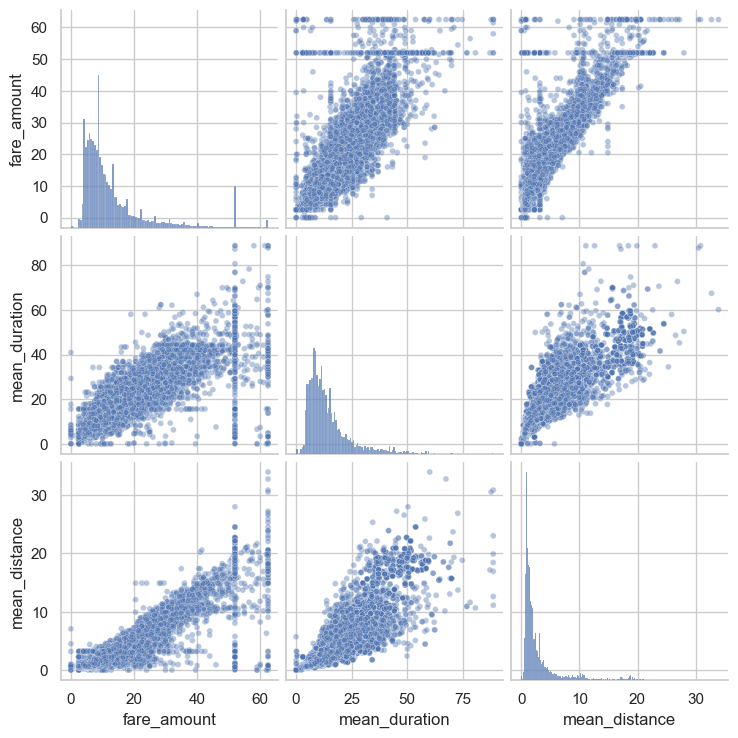

In [137]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],plot_kws={'alpha':0.4, 'size':5})

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [142]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


In [144]:
print(df2.corr(method='pearson').to_csv())

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.0,0.2664632133906713,0.001045253842877052,0.004740820009934472,0.001876259690818668,-0.0028738001021985544
passenger_count,0.2664632133906713,1.0,0.014941609326788239,0.013427637266643519,0.015852073557633507,-0.022035171712455292
fare_amount,0.001045253842877052,0.014941609326788239,1.0,0.910185460213433,0.8591054447614108,-0.02007546942699929
mean_distance,0.004740820009934472,0.013427637266643519,0.910185460213433,1.0,0.8748640408470975,-0.039725371388227404
mean_duration,0.001876259690818668,0.015852073557633507,0.8591054447614108,0.8748640408470975,1.0,-0.021582769345393518
rush_hour,-0.0028738001021985544,-0.022035171712455292,-0.02007546942699929,-0.039725371388227404,-0.021582769345393518,1.0



Visualize a correlation heatmap of the data.

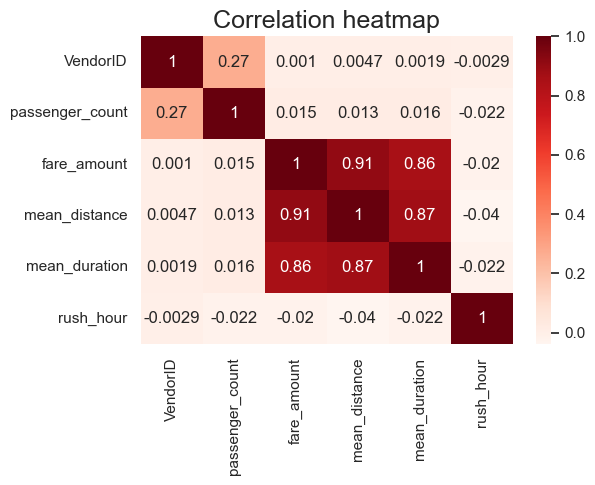

In [147]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'),annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

#### Correlation with Target Variable (`fare_amount`)

Both `mean_duration` and `mean_distance` exhibit a strong correlation with the target variable, `fare_amount`. Additionally, these two independent variables themselves show a high correlation with each other (approximately 0.87).

In the context of linear regression, highly correlated predictor variables can pose challenges for interpreting the individual impact of each variable on the dependent variable. However, if the primary objective is accurate prediction rather than detailed interpretation of individual variable contributions, then including correlated variables can be acceptable.

Given that the goal is to predict `fare_amount` for machine learning models, it is advisable to test the model's performance by including both `mean_duration` and `mean_distance`, despite their correlation. This approach allows for empirical evaluation of their combined predictive power.


**Even though rush_hour has a weak correlation with fare_amount and others, it might still impact fares in non-linear ways. So, we keep it in the model**

A non-linear relationship means that the effect of one variable on another isn’t a constant, straight-line change. For example, during rush hour, fares might not always increase by the same amount; the effect could be small at some times and larger at others depending on conditions like traffic congestion. So, even if the direct (linear) correlation is weak, rush_hour could still impact fares in more complex, non-linear ways.

Even though VendorID and passenger_count show weak individual correlations with fare_amount, they may still add value in the model.Their impact might be non-linear or only noticeable under certain conditions, which a machine learning model can capture even if a simple correlation measure doesn't show it strongly.



## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. 


### Task 8a. Split data into outcome variable and features

In [153]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [156]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

Although VendorID is stored as an integer, we know it represents a categorical variable.

Converting it to a string makes it clear that the variable is categorical and should be treated as such.

In [161]:
# Convert the 'VendorID' column to a string data type.
# Although VendorID is stored as an integer, it actually represents a categorical variable (e.g., different taxi companies).
X['VendorID'] = X['VendorID'].astype(str)

# Convert all categorical variables in DataFrame X to dummy variables.
# pd.get_dummies() creates new binary columns (0 or 1) for each category.
# 'drop_first=True' drops the first category of each variable to avoid multicollinearity.
X['VendorID'] = pd.get_dummies(X['VendorID'], drop_first=True)

# Display the first few rows of the updated DataFrame to verify the changes.
X.head()



,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,True,6,3.521667,22.847222,0
1,False,1,3.108889,24.470370,0
2,False,1,0.881429,7.250000,1
3,True,1,3.700000,30.250000,0
4,True,1,4.435000,14.616667,0


In [163]:
print(X['VendorID'].dtype)

bool


When  dummy encode a categorical variable with only two categories (like VendorID converted to 0 and 1), the resulting column is numeric (0s and 1s) and often stored as uint8.So, our VendorID column has been converted into a dummy variable.

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [168]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

**Equal Weight for All Features:** Standardization ensures that features are on a similar scale so that one feature doesn't dominate others due to its scale.
**Improved Model Performance** Perform better when the data is standardized.

In [172]:
# Standardize the X variables

# Create a StandardScaler object and fit it to the training features.
# This calculates the mean and standard deviation for each feature in X_train.
scaler = StandardScaler().fit(X_train)

# Use the scaler to transform X_train.
# This standardizes the features by subtracting the mean and dividing by the standard deviation,
# resulting in each feature having a mean of 0 and a standard deviation of 1.
X_train_scaled = scaler.transform(X_train)

# Print the standardized training data to verify the transformation.
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.89286563 -0.50301524  0.8694684   0.17616665 -0.64893329]
 [ 0.89286563 -0.50301524 -0.60011281 -0.69829589  1.54099045]
 [-1.11998936  0.27331093 -0.47829156 -0.57301906 -0.64893329]
 ...
 [-1.11998936 -0.50301524 -0.45121122 -0.6788917  -0.64893329]
 [-1.11998936 -0.50301524 -0.58944763 -0.85743597  1.54099045]
 [ 0.89286563  1.82596329  0.83673851  1.13212101 -0.64893329]]


### Fit the model

Instantiate your model and fit it to the training data.

In [175]:
# Fit your model to the training data

# Instantiate the model:
# Create an instance of the LinearRegression model with default settings.
# This step allocates memory and initializes the model's internal parameters.
lr = LinearRegression()  

# Fit the model to the training data:
# The fit() method is an instance method, so it must be called on the model instance 'lr'.
# This trains the model by finding the best-fitting line through the data (X_train_scaled) to predict y_train.
lr.fit(X_train_scaled, y_train)


LinearRegression()

### Task 8c. Evaluate model

### Train data

Model performance on the training data is evaluated by calculating the following metrics:

* **Residual Sum of Squares (RSS)**
* **Explained Variance Score (R²)**
* **Mean Absolute Error (MAE)**
* **Mean Squared Error (MSE)**
* **Root Mean Squared Error (RMSE)**

In [179]:
# Evaluate the model performance on the training data

# we use two  methods are used to calculate R² for Cross-Verification:

#  Method 1 : Using the model's score() method.
# lr.score() takes in the features (X_train_scaled) and the true target values (y_train),
# automatically makes predictions internally, and then computes R² by comparing these predictions to y_train.
r_sq = lr.score(X_train_scaled, y_train)
print("Coefficient of determination (R²) using lr.score:", r_sq)

# Method 2 : Using the r2_score() function.
# First, we manually predict the target values using the model:
y_pred_train = lr.predict(X_train_scaled)
# Then, we pass the actual values (y_train) and the predicted values (y_pred_train) to r2_score() to compute R².
r2 = r2_score(y_train, y_pred_train)
print("Coefficient of determination (R²) using r2_score:", r2)

# Both methods ultimately compare the predicted values to the actual values,
# but lr.score() does the prediction step for you automatically.


# Calculate and print the Mean Absolute Error (MAE)
print('MAE:', mean_absolute_error(y_train, y_pred_train))

# Calculate and print the Mean Squared Error (MSE)
print('MSE:', mean_squared_error(y_train, y_pred_train))

# Calculate and print the Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination (R²) using lr.score: 0.8398434585044773
Coefficient of determination (R²) using r2_score: 0.8398434585044773
MAE: 2.186666416775421
MSE: 17.88973296349268
RMSE: 4.229625629236313


**R²**

Maximum Value: The best R² can be is 1.0 (or 100%).

Our Model: With an R² of 0.84, the model explains 84% of the variance in the target variable.

Comparison: A perfect model (with no error) would score 1.0, so our 0.84 is close to that ideal.


**MAE (Mean Absolute Error):**

Best case: MAE = 0 (perfect predictions). Here, our model's MAE is 2.19, meaning on average, the predictions are off by $2.19 from the actual fares.

**MSE (Mean Squared Error):**

Best case: MSE = 0 (perfect predictions).
In our case, the MSE is 17.89. This metric squares the errors, so larger mistakes have a bigger impact.

**RMSE (Root Mean Squared Error):**

Best case: RMSE = 0 (perfect predictions).
Our model's RMSE is 4.23, which gives the average error in the same units as the target variable (dollars).

### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [183]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [185]:
# Evaluate the model performance on the testing data
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8682583641795452
R^2: 0.8682583641795452
MAE: 2.1336549840593957
MSE: 14.326454156998974
RMSE: 3.785030271609327


T**he results for the test set are:**

Coefficient of determination (R²): 0.8683

MAE: 2.13

MSE: 14.33

RMSE: 3.79

**Comparing with the Training Data:**

Training R²: ~0.84

Training MAE: ~2.19

Training MSE: ~17.89

Training RMSE: ~4.23

**Conclusion:**

    * Slightly Better Test Performance: The test R² (0.8683) is a bit higher than the training R² (0.84), and the error metrics (MAE, MSE, RMSE) are lower on the test set.

    * Good Generalization:This indicates that the model performs well on unseen data and is not overfitting.

    * Consistent Results:The model's performance is consistent between training and testing, suggesting it has learned a reliable relationship between the features and the target variable.

**Overall, the model generalizes well and can be expected to perform reliably on new data.**


## PACE: **Execute**


### Task 9a. Results


In [191]:
# Create a `results` dataframe

# This further confirms that the analysis (i.e., comparing actual vs. predicted values)
# This is based on the test data.

# Create a DataFrame to compare actual vs. predicted values for the test set

# ravel() is a NumPy method that converts a multi-dimensional array into a 1D array.
# For example, if y_pred_test is a column vector (shape: (n, 1)),
# y_pred_test.ravel() turns it into a simple 1D list of values (shape: (n,)).
# Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
# data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}


results = pd.DataFrame(data={'actual': y_test['fare_amount'],  
                             'predicted': y_pred_test.ravel() }) # y_pred_test = lr.predict(X_test_scaled)

# Calculate residuals: the difference between actual and predicted values
results['residual'] = results['actual'] - results['predicted']

# Display the first few rows of the results DataFrame
print(results.head())





       actual  predicted   residual
5818     14.0  12.356503   1.643497
18134    28.0  16.314595  11.685405
4655      5.5   6.726789  -1.226789
7378     15.5  16.227206  -0.727206
13914     9.5  10.536408  -1.036408


* A positive residual  means the model under-predicted the fare.
* A negative residual  means the model over-predicted the fare.
* This snapshot indicates that while the model generally makes reasonable predictions, there are individual cases (like row 18134) where the prediction error is high. This could be due to outliers or specific trip characteristics that the model doesn't fully capture.
* this dataframe helps you see both the direction (over- or under-prediction) and the size of the errors for individual test samples.

### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. Predicted')

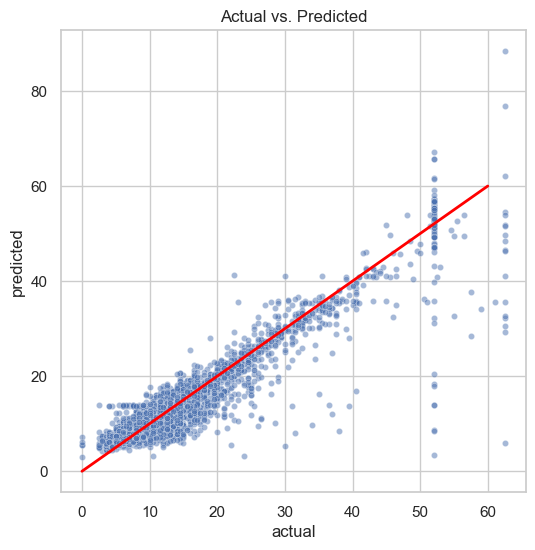

In [196]:
# Create a scatterplot to visualize `predicted` over `actual`


fig, ax = plt.subplots(figsize=(6, 6))# Create a figure and axis for the scatterplot with a fixed size (6x6 inches)

sns.set(style='whitegrid')# Set the Seaborn style to 'whitegrid' for a clean background with gridlines


# Create a scatterplot to visualize predicted values versus actual values.
# x='actual' and y='predicted' specify which columns to plot from the 'results' DataFrame.
# s=20 sets the marker size, and alpha=0.5 makes the markers semi-transparent.
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax)

# Draw a diagonal line (x = y) from (0, 0) to (60, 60) in red with a line width of 2.
# Since we know that a perfect prediction means predicted = actual,
# we manually draw this diagonal line using plt.plot().
# This line helps visually compare how well the model's predictions match the actual values.
# If all points lie on this line, the model would be perfect; deviations indicate prediction errors.
plt.plot([0, 60], [0, 60], c='red', linewidth=2)


# Add a title to the plot
plt.title('Actual vs. Predicted')


* Since we know that a perfect prediction means predicted = actual, we manually draw a diagonal line from (0,0) to (60,60) using plt.plot([0,60], [0,60], c='red', linewidth=2). This line helps visually compare how well the model's predictions match the actual values. If all points lie on this line, the model is perfect. If they deviate, the model has some error.

Visualize the distribution of the `residuals` using a histogram.

Text(0, 0.5, 'count')

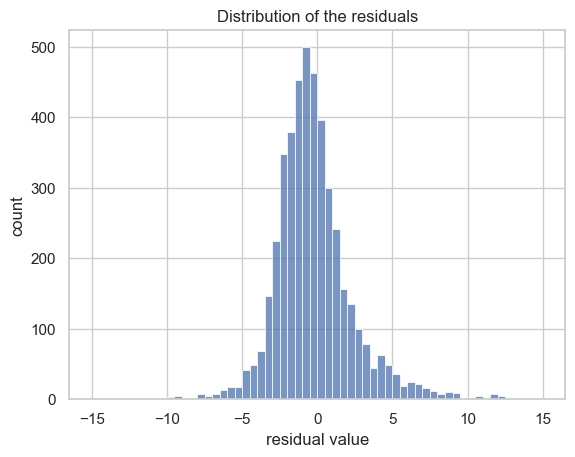

In [200]:
# Visualize the distribution of the `residuals`

# 'bins=np.arange(-15, 15.5, 0.5)' creates an array of bin edges starting at -15, ending at 15.5, with intervals of 0.5.
sns.histplot(results['residual'], bins=np.arange(-15, 15.5, 0.5))# results['residual'] = results['actual'] - results['predicted']


plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')




In [202]:
# Calculate residual mean
results['residual'].mean()

-0.015442621528680412

* The result of results'residual'.mean() is approximately 0.015, which is very close to zero. 

* Mean near Zero: A mean residual close to zero indicates that, on average, the model's prediction errors cancel out. This means the model doesn't consistently over-predict or under-predict.

* Having a mean residual near zero and an approximately normal residual distribution means that the model's errors are random and unbiased, which is desirable for a reliable model.

Create a scatterplot of `residuals` over `predicted`.

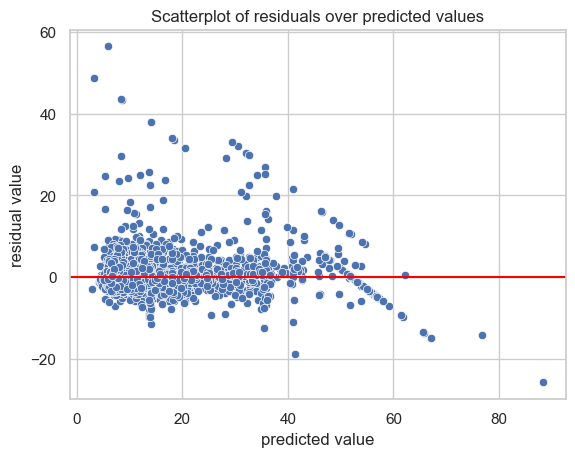

In [206]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
# Draw a horizontal red line at y=0.
# This line represents the point of zero error (no residual).
# It helps visually assess whether the residuals are evenly distributed around zero.
plt.axhline(0, c='red')

plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

* The residual plot shows that most errors are evenly spread above and below zero, which means the model doesn't consistently over- or under-predict. The noticeable sloping lines—from the upper-left to the lower-right—are due to the fixed values we set: one at 62.50 (the imputed maximum) and one at 52 (the flat fare for JFK trips). These fixed fares cause many residuals to line up at those values.


### Task 9c. Coefficients

To determine which feature had the greatest effect on trip fare, the model's coefficients are examined using the `coef_` attribute. The coefficients are output in the order of the features used to train the model. The absolute magnitude of a coefficient indicates the strength of its effect on the target variable. A larger absolute coefficient suggests that a one-unit change in that feature (when other features are held constant) has a more significant impact on the predicted `fare_amount`.


In [213]:
# Output the model's coefficients
#  Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
coefficients = pd.DataFrame(data=lr.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.054373,0.030825,7.133867,2.812115,0.110233


*Interpretation of Coefficients:**

The coefficients reveal the estimated change in the dependent variable (`fare_amount`) for a one-unit increase in the corresponding independent variable, assuming all other variables in the model are held constant.

It is crucial to correctly interpret these coefficients, especially when the data has been standardized (e.g., using `StandardScaler()`). In such cases, the units of the features are no longer their original units (e.g., miles or minutes) but rather standard deviations.

For example, if `mean_distance` is identified as the feature with the greatest weight, and its coefficient is, say, 7.13, a common misinterpretation would be that "for every mile traveled, the fare amount increases by a mean of 7.13." This is incorrect because the data used to train the model was standardized.

The correct interpretation of this coefficient is: **controlling for other variables, for every +1 change in standard deviation of `mean_distance`, the fare amount increases by a mean of 7.13.** This interpretation applies similarly to all other coefficients when the independent variables have been standardized.


* When predictors are highly correlated, the standard errors tend to be larger, which leads to wider confidence intervals. Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

**So, translate this back to miles instead of standard deviation (i.e., unscale the data).**

Calculate the standard deviation of mean_distance in the X_train data.

Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

* Because our model's coefficients are based on standardized data. The standard deviation tells us the spread of the original data.

* So, we divide by the standard deviation:Dividing the coefficient by the standard deviation converts its effect from a "per standard deviation" change to a "per original unit" change, making it easier to interpret.

In [219]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Now we can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of dollar 7.13. Or, for every 1 mile traveled, the fare increased by a mean of $ 2.00.

* **Key insights that emerged from the model(s):**
    * **High Predictive Power:** The model achieved an R² of approximately 0.87 on the test data, indicating that it explains 87% of the variance in fare amounts.
    * **Low Prediction Errors:** Metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error) are low, suggesting that, on average, the predictions are close to the actual fares.
    * **Key Predictors:** The model heavily relies on features like `mean_distance` and `mean_duration`, both of which exhibit strong correlations with `fare_amount` (and with each other). This confirms that longer and slower trips generally result in higher fares.
    * **Domain Knowledge Integration:** Although `RatecodeID` was not directly used as a predictor, it was employed in post-processing to set a flat fare of $52 for rides with `RatecodeID` 2 (JFK trips). This ensures the model's predictions adhere to known fixed fare rules.
    * **Even Residual Distribution:** The residuals (the differences between actual and predicted values) are roughly normally distributed around zero, indicating that the model does not consistently over- or under-predict.
    These insights demonstrate that the model performs robustly on unseen data while effectively incorporating domain-specific adjustments.

* **Business recommendations proposed based on the models built:**
    Based on the models constructed, several key business recommendations are proposed:
    * **Optimize Pricing & Revenue Forecasting:** The model’s high R² (~0.87) and low prediction errors suggest its reliability in forecasting taxi fares. This capability enables improved revenue projections and the development of dynamic pricing strategies.
    * **Enhance Operational Efficiency:** Insights derived from key features such as `mean_duration` and `mean_distance` highlight the crucial role of trip length and time. These insights can be leveraged to optimize fleet distribution, plan driver schedules more effectively, and manage demand during peak times.
    * **Integrate Domain-Specific Rules:** The model's ability to adjust for fixed fares (e.g., $52 for JFK trips via `RatecodeID` 2) ensures consistency with industry standards. Incorporating such domain rules helps maintain fairness and regulatory compliance.
    * **Implement a Real-Time Fare Estimation Tool:** With robust predictive capabilities, a real-time fare estimation system can be developed to provide instant fare estimates to both customers and drivers, leading to increased transparency and improved customer satisfaction.
    * **Monitor and Audit for Anomalies:** A model that effectively captures residuals can also serve as a tool for detecting anomalies in fare patterns. This can assist in identifying unusual pricing issues and ensuring quality control.
    In summary, leveraging the model for fare prediction can lead to improved pricing strategies, enhanced operational efficiency, and an elevated customer experience, all while adhering to industry standards through domain-specific adjustments.


### Task 9d. Conclusion

1.  **Key Takeaways from this Notebook:**
    * Multiple linear regression is a powerful analytical tool for estimating a continuous dependent variable from multiple independent variables.
    * Exploratory Data Analysis (EDA) is essential for the effective selection of both numeric and categorical features when constructing a multiple linear regression model.
    * The process of fitting multiple linear regression models may involve iterative trial and error to select variables that contribute to an accurate model while adhering to (or consciously deviating from, depending on the use case) model assumptions.

2.  **Results to be Presented from this Notebook:**
    * The adherence to linear regression assumptions can be discussed.
    * The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) scores obtained from the model can be presented to quantify its predictive performance.


# Further Steps and Prediction Refinement

More work must be done to prepare the predictions to be used as inputs into the model for the upcoming section. This work will be broken into the following steps:

1.  Get the model's predictions on the full dataset.
2.  Impute the constant fare rate of \$52 for all trips with rate codes of `2`.
3.  Check the model's performance on the full dataset.
4.  Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.




In [224]:
# Scale the full dataset X using the pre-fitted StandardScaler to ensure it has the same scale as the training data.
X_scaled = scaler.transform(X)

# Use the trained LinearRegression model to predict the target variable (fare amount) for the full, scaled dataset.
y_preds_full = lr.predict(X_scaled)

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

**This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.**

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [227]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance on full dataset

In [230]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683971
MAE: 1.9925062522699841
MSE: 12.101575504689972
RMSE: 3.4787318816905066


Save final predictions with mean_duration and mean_distance columns

In [233]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


**In the Further Steps and Prediction Refinemen part, we took a simplified approach:**

Prediction on the Full Dataset:
We first used our trained model to predict fares for all rides in the dataset, including those with RatecodeID 2.

Manual Imputation for Fixed Fare Rides:
After obtaining predictions, we replaced the predicted values with dollar 52 for any ride that had a RatecodeID of 2 (which indicates a fixed fare for JFK trips).

This means:
We predicted fares for everything, then corrected the predictions for the rides with a fixed rate.

**Best Practice (Ideal Way):**

Separate the Data: Remove rides with RatecodeID 2 before training, since their fare is known (always 52).

Train the Model: Train the model only on rides that require prediction (i.e., rides without RatecodeID 2).

Post-Prediction: After training, add the fixed-rate rides back into the dataset with their known fare (52).

This approach prevents the model from learning on data that already have a predetermined fare, which can lead to a more accurate and interpretable model.






